# Using matplotlib basemap to project California data

In [1]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point

In [2]:
# define basemap colors
land_color = '#F6F6F6'
water_color = '#D2F5FF'
coastline_color = '#333333'
border_color = '#999999'

In [3]:
# load the point data and select only points in california
df = pd.read_csv('data/usa-latlong.csv')
usa_points = GeoDataFrame(df)
usa_points['geometry'] = usa_points.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
states = GeoDataFrame.from_file('data/states_21basic/states.shp')
california = states[states['STATE_NAME']=='California']['geometry']
california_polygon = california.iloc[0]
california_points = usa_points[usa_points.within(california_polygon)]

In [4]:
# first define a transverse mercator projection
map_width_m = 1000 * 1000
map_height_m = 1200 * 1000
target_crs = {'datum':'WGS84',
              'ellps':'WGS84',
              'proj':'tmerc',
              'lon_0':-119,
              'lat_0':37.5}

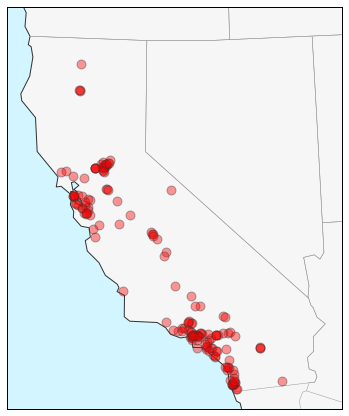

In [5]:
# plot the map
fig_width = 6
plt.figure(figsize=[fig_width, fig_width * map_height_m / float(map_width_m)])

m = Basemap(ellps=target_crs['ellps'],
            projection=target_crs['proj'],
            lon_0=target_crs['lon_0'], 
            lat_0=target_crs['lat_0'],
            width=map_width_m, 
            height=map_height_m,
            resolution='l',
            area_thresh=10000)

m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawstates(color=border_color)
m.drawmapboundary(fill_color=water_color)

x, y = m(np.array(california_points['longitude']), np.array(california_points['latitude']))
m.scatter(x, y, s=80, color='r', edgecolor='#333333', alpha=0.4, zorder=10)

plt.show()

In [6]:
# next define an albers projection for california
target_crs = {'datum':'NAD83',
              'ellps':'GRS80',
              'proj':'aea', 
              'lat_1':35, 
              'lat_2':39, 
              'lon_0':-119, 
              'lat_0':37.5, 
              'x_0':map_width_m/2, 
              'y_0':map_height_m/2,
              'units':'m'}

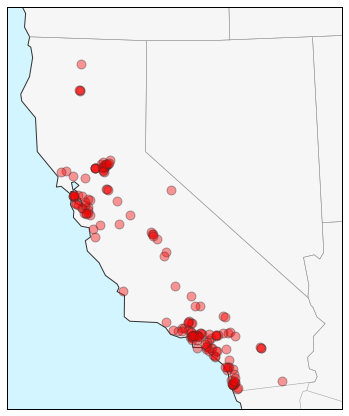

In [7]:
# plot the map
fig_width = 6
plt.figure(figsize=[fig_width, fig_width * map_height_m / float(map_width_m)])

m = Basemap(ellps=target_crs['ellps'],
            projection=target_crs['proj'],
            lat_1=target_crs['lat_1'], 
            lat_2=target_crs['lat_2'], 
            lon_0=target_crs['lon_0'], 
            lat_0=target_crs['lat_0'],
            width=map_width_m, 
            height=map_height_m,
            resolution='l',
            area_thresh=10000)

m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawstates(color=border_color)
m.drawmapboundary(fill_color=water_color)

x, y = m(np.array(california_points['longitude']), np.array(california_points['latitude']))
m.scatter(x, y, s=80, color='r', edgecolor='#333333', alpha=0.4, zorder=10)

plt.show()